# PART 1. Using statistical methods to prove whether there is a connection between time series or not

In [35]:

# Libraries import

from pandas import read_csv, DataFrame
import numpy as np 
import matplotlib.pyplot as plt                   # import the library for plotting graphics
import csv
import numpy as np
from sklearn.linear_model import LinearRegression # import LinearRegression library from sklearn
import statsmodels.api as sm                      # import the library to identify statistical patterns
from collections import Counter                   # to count the number of objects in the dictionary
from datetime import datetime
import pandas as pd

In [6]:
# import the file, previously changed its format to .csv

dataset_SP_weeks=read_csv('Dataset_SP_weeks.csv',';',delimiter=";", encoding="windows-1251")
dataset_FTSE_weeks=read_csv('Dataset_FTSE_weeks.csv',';',delimiter=";", encoding="windows-1251")

# reading the data form (checking the correct data import)

print(dataset_SP_weeks[:5])   
print(dataset_FTSE_weeks.shape)

# reading the file 'Dataset_SP_weeks.csv' into the development environment and opening it:

with open('Dataset_SP_weeks.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";") # writing our delimited file with ";" to the csvfile_reader variable
    next(csvfile_reader)                                      # skiping heading to go exactly to numbers
    data_array_SP = [line[2] for line in csvfile_reader]
print(data_array_SP)                                          # displaying the data sheet on the screen


# Carrying out similar operations with the following file "Dataset_FTSE_weeks.csv"

with open('Dataset_FTSE_weeks.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_FTSE = [line[2] for line in csvfile_reader]
print(data_array_FTSE)

In [11]:
data_array_FTSE_mass = []              # creating two empty arrays
data_array_SP_mass = []
for i in range(len(data_array_FTSE)):
    t1 = float(data_array_FTSE[i])     # transition from string data to float
    t2 = float(data_array_SP[i])             
    data_array_FTSE_mass.append(t1)   
    data_array_SP_mass.append(t2)      # adding each item to a new array

# conversion to arrays suitable for analysis using the np.asarray() function
# which converts a sequence to an array

data_array_FTSE_mass = np.asarray(data_array_FTSE_mass)
data_array_SP_mass = np.asarray(data_array_SP_mass)
print(data_array_SP_mass) 
print(data_array_FTSE_mass) 

In [12]:
# Finding out the degree of correlation between indices

data_array_FTSE_mass_x = np.array(data_array_FTSE_mass).reshape((-1, 1))       # converting one of the arrays to a two-dimensional array
data_array_FTSE_mass_y = np.array(data_array_SP_mass)
model = LinearRegression().fit(data_array_FTSE_mass_x, data_array_FTSE_mass_y) # building a regression model


R= model.score(data_array_FTSE_mass_x, data_array_FTSE_mass_y)  # find the R2 value
print('R^2 = ', R)
print('a1:', model.intercept_)                                  # coefficient a1
print('a0:', model.coef_)                                       # coefficient a0

In [19]:
# Graphical interpretation of correlation

x=np.arange(-10.0,16.0)
y = 0.613546*x+0.11422965728811352
fig = plt.figure()
ax = fig.add_subplot(1,1,1)         # create drawing space

#Displaying Index Points and Linear Fit

plt.plot(data_array_FTSE_mass, data_array_SP_mass, 'bo', color = 'blue', label = 'Historical data') 
plt.plot(x,y)
plt.title('Week data. FTSE and S&P 500 correlation')
plt.xlabel('Profitability FTSE')  # axis labels
plt.ylabel('Profitability S&P 500') 
ax.grid() # building grid
ax.set_ylim(-18, 18) 
ax.set_xlim(-10, 18)
plt.show()

# PART 2. Building a predictive model ARIMA on weekly charts

In [22]:
# Graphic interpretation of weekly charts
dataset_FTSE_weeks=read_csv('Dataset_FTSE_weeks.csv',';',delimiter=";", encoding="windows-1251")  
print(dataset_FTSE_weeks.shape)
dataset_FTSE_weeks.head()
dataset_FTSE_weeks.Close
dataset_FTSE_weeks.Close.plot()
plt.title('FTSE price dynamics')
plt.xlabel('Week number') 
plt.ylabel('Close prices FTSE')
plt.grid()
plt.show()

# Building histogramm to check if the distribution is normal
dataset_FTSE_weeks.Close.hist()

In [28]:
testDF = sm.tsa.adfuller(dataset_FTSE_weeks.Close) # apply the Dicky-Fuller test function to our array to check the stationarity of the row
print('adf:', testDF[0]) 
print('p-value:', testDF[1])
print('Critical values:', testDF[4])
if testDF[0]>testDF[4]['5%']:                      # Comparing hypotheses. Here we choose 5% significance as the DF criterion.
    print('Row is not stationary!')
else:
    print('Row is stationary!')
    

Row is not stationary!


In [30]:
# Reducing a non-stationary series to a stationary one

close = dataset_FTSE_weeks.Close                    # create a new variable close to make it easier to write code (close prices)
close_stationary = close.diff(periods = 1).dropna() # difference between the current row and the previous
testDF = sm.tsa.adfuller(close_stationary)          # reapply the Dicky-Fuller test function

# Likewise сompare hypotheses. Here we choose also 5% significance as the DF criterion.
print('adf:', testDF[0])
print('p-value:', testDF[1])
print('Critical values:', testDF[4])
if testDF[0]>testDF[4]['5%']: 
    print('Row is not stationary!')
else:
    print('Row is stationary!')

Row is stationary!


In [32]:
# plotting partial autocorrelation

Partial_autocorrelation = sm.graphics.tsa.plot_pacf(close_stationary, lags = 19)

In [33]:
model_financial =  close[:79]                                                       # choose a training set for training the model
model_ARIMA = sm.tsa.ARIMA(model_financial, order=(15,1,1)).fit(full_output = True) # model training (removing the 15th lag for white noise)
print (model_ARIMA.summary())

C:\Users\Samir555\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Samir555\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\Samir555\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Samir555\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


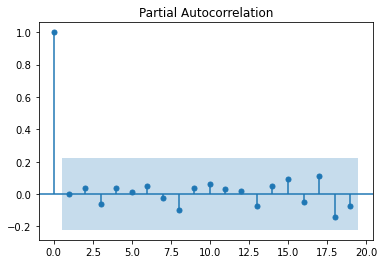

In [34]:
Q_test = sm.tsa.stattools.acf(model_ARIMA.resid, qstat = True)
print (DataFrame({'q_stat': Q_test[1], 'p_value': Q_test[2]}))
Partial_autocorrelation = sm.graphics.tsa.plot_pacf(model_ARIMA.resid, lags = 19)

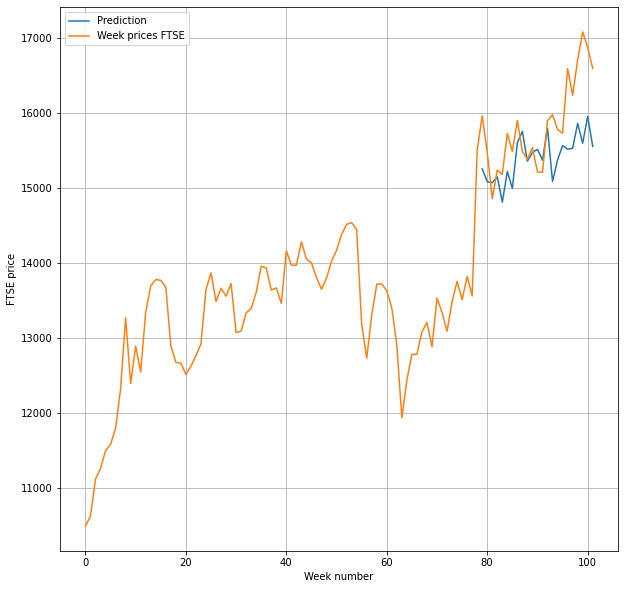

In [210]:
# Forecast model visualization
week_test = np.arange(79, 102)                    # create an array for building the forecast part of the chart (forecasting part)
week_train = np.arange(0,102)                     # create an array for plotting the entire chart (data for all weeks)
pred = model_ARIMA.predict(79, 101, typ='levels') # predict further behavior of the model
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(week_test, pred, label = 'Prediction')
ax.plot(week_train, close, label = 'Week prices FTSE')
ax.legend()                                       # display legends for readability
plt.grid()
plt.xlabel('Week number')
plt.ylabel('FTSE price')
plt.show()


# PART 3. The connection between the S&P 500 and the FTSE on daily fluctuations


In [43]:
# Reading S&P 500 data from tables

# date column
with open('DatasetSP_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_date_america = [line[0] for line in csvfile_reader]
    
# time column
with open('DatasetSP_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_time_america = [line[6] for line in csvfile_reader]
data_array_times_america = data_array_time_america[0:421]                 # time from 9:30 a.m to 16:30 p.m (data changes at intervals per minute)
#print(data_array_date_america[:300])

# prices column
with open('DatasetSP_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_SP_america = [line[4] for line in csvfile_reader]
    
# import initially data columns of time    
with open('DatasetSP_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_times_america_full = [line[2] for line in csvfile_reader]  # full times from Excel table


# counting the number of entries in the array S&P 500
a = Counter(data_array_date_america)
sorted_mass_america = sorted(a.items())                                   # creating dictionary
sorted_mass_dict_america = dict(sorted_mass_america)
dates_america = []
dates_value_america=[]
for i, key in enumerate(sorted_mass_dict_america):                        # dates and number of records for each date
    dates_america.append(key)
    dates_value_america.append(sorted_mass_dict_america[key])

# Similarly reading FTSE data from tables 

# import initially data columns of time
with open('DatasetFTSE_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_time = [line[1] for line in csvfile_reader]

# prices column    
with open('DatasetFTSE_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_FTSE = [line[2] for line in csvfile_reader]

# date column    
with open('DatasetFTSE_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_date = [line[0] for line in csvfile_reader]

# time column    
with open('DatasetFTSE_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader)
    data_array_times = [line[4] for line in csvfile_reader]
data_array_times_array = data_array_times[0:451]


# counting the number of entries in the array FTSE
с = Counter(data_array_date)
sorted_mass = sorted(с.items())
sorted_mass_dict = dict(sorted_mass)
dates = []
dates_value=[]
for i, key in enumerate(sorted_mass_dict):
    dates.append(key)
    dates_value.append(sorted_mass_dict[key])

# initialization of parameters
sum=0
sum1=0
sumbegin = 0
sumend = 0
day=[]
index_begin=0
count=0
mass_arr = []
massiv_data_used_asia=[]
prices_days_asia=[]

# a function that combines paired days into one, iterating over all dates in an arrays to create unique entries

for i in range(0, len(sorted_mass_dict)-1):
    if i==0:
        sum = int(dates_value[i]+dates_value[i+1])+1
        sum1=0
    else:
        sum =int(dates_value[i+1])+sum
        sum1=sum-int(dates_value[i]+dates_value[i+1])
        
    if (int(dates[i+1]) - int(dates[i]) ==1) and [x for x in dates_america if x==dates[i+1]]:
        massiv_data_used_asia.append(dates[i+1]) 
        time_arr = data_array_time[sum1:sum]
        day_close = data_array_FTSE[sum1:sum]
        for m in range(1, len(data_array_times_array)):
            for t in time_arr: 
                if data_array_times_array[m] == t:
                    if mass_arr==[]:
                        index_begin=time_arr.index(t)
                    mass_arr.append(t)
                    count+=1
                    break
        if (index_begin+len(mass_arr)>=  len(day_close)) and len(mass_arr_america)!=0:
            index_end= len(day_close)
            price = ((float(day_close[index_end-1])-float(day_close[index_begin]))/float(day_close[index_begin]))*100
        elif (index_begin+len(mass_arr)>=  len(day_close)) and len(mass_arr_america)==0:
            price=0
        else:
            index_end = index_begin+len(mass_arr)
            # calculation of the increase from one point in time to an another and write it into the array of price increases in the Asian session
            price = ((float(day_close[index_end-1])-float(day_close[index_begin]))/float(day_close[index_begin]))*100
        prices_days_asia.append(price)
        count = 0
        mass_arr.clear()
# print(prices_days_asia)
        

In [44]:
# Formation of a positive or negative price increase for the S&P 500 index

finish_massiv_dates_america=[]

# initialization of the clock array for america

mass_arr_america = []

# intersection the two arrays to figure out which dates to use for the S&P 500
# it is necessary to thin the array so that the arrays for comparing both indices are the same

for m in range(0, len(massiv_data_used_asia)):
    for t in dates_america: 
        if massiv_data_used_asia[m] == t:
            finish_massiv_dates_america.append(t)
            break            

# initialization of parameters

suma1=0
suma=0
count_america = 0
index_begin_america = 0
index_end_america = 0
prices_days_america = []

# the blocks themselves are single, so the structure of the code will be slightly different
# Start forming blocks of sums to form a unique array of dates

for i in range(0, len(dates_america)):
    # formation of the amount from one date to another
    
    if i==0:
        suma =int(dates_value_america[i])+1
        suma1=0
    else:
        suma =int(dates_value_america[i])+suma
        suma1=suma-int(dates_value_america[i])


    if [x for x in finish_massiv_dates_america if x==dates_america[i]]  and [x for x in dates_america if x==dates_america[i]]: 
        time_arr_america = data_array_times_america_full[suma1:suma]
        day_close_america = data_array_SP_america[suma1:suma]
        for m in range(1, len(data_array_times_america)):
            for t in time_arr_america: 
                if data_array_times_america[m] == t:
                    if mass_arr_america==[]:
                        index_begin_america=time_arr_america.index(t)
                    mass_arr_america.append(t)
                    count_america+=1
                    break

        if (index_begin_america+len(mass_arr_america)>=  len(day_close_america)) and len(mass_arr_america)!=0:
            index_end_america= len(day_close_america)
            price = ((float(day_close_america[index_end_america-1])-float(day_close_america[index_begin_america]))/float(day_close_america[index_begin_america]))*100
        elif (index_begin_america+len(mass_arr_america)>=  len(day_close_america)) and len(mass_arr_america) ==0:
            price=0
        else:
            index_end_america = index_begin_america+len(mass_arr_america)
            # calculation of the increase from one point in time to an another and write it into the array of price increases in the Asian session
            
            price = ((float(day_close_america[index_end_america-1])-float(day_close_america[index_begin_america]))/float(day_close_america[index_begin_america]))*100
        prices_days_america.append(price) # price increase array
        count_america = 0
        mass_arr_america.clear()
  
    

R^2 =  1.8233997670646929e-06
a1: 0.0456405028570506
a0: [-0.00137209]


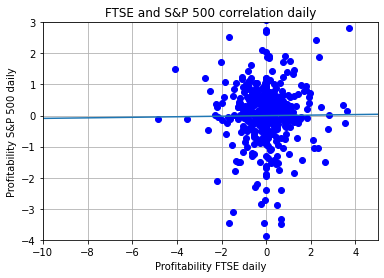

In [46]:
# Formation of a correlation model
prices_days_asia = np.array(prices_days_asia).reshape((-1, 1)) 
prices_days_america = np.array(prices_days_america)
model = LinearRegression().fit(prices_days_asia, prices_days_america) 
R= model.score(prices_days_asia, prices_days_america) 
print('R^2 = ', R)
print('a1:', model.intercept_) 
print('a0:', model.coef_)

import matplotlib.pyplot as plt 
x=np.arange(-10.0,16.0)
y = 0.0088*x-0.00338
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
plt.plot(prices_days_asia, prices_days_america, 'bo', color = 'blue', label = 'Historical data') 

plt.plot(x,y)
plt.title('FTSE and S&P 500 correlation daily')
plt.xlabel('Profitability FTSE daily') 
plt.ylabel('Profitability S&P 500 daily') 
ax.grid()
ax.set_ylim(-4, 3)
ax.set_xlim(-10, 5)
plt.show()

# PART 4. Impact of the main session of the FTSE index on the first hour of the main session of the S&P 500 index

In [ ]:
# Formation of an array of prices of the first hour of trading of the S&P 500


with open('DatasetSP_days.csv', 'r') as file_data_csv:
    csvfile_reader = csv.reader(file_data_csv, delimiter=";")
    next(csvfile_reader) 
    data_array_time_america = [line[5] for line in csvfile_reader]
data_array_times_america_hour = data_array_time_america[0:62] # time from 9: 30 to 10: 30 (the first hour of trading)

suma1=0
suma=0
prices_days_america_hour = []
count_america = 0
index_begin_america = 0
price_hour = 0


for i in range(0, len(dates_america)):
    if i==0:
        suma =int(dates_value_america[i])+1
        suma1=0
    else:
        suma =int(dates_value_america[i])+suma
        suma1=suma-int(dates_value_america[i])
    if [x for x in finish_massiv_dates_america if x==dates_america[i]]  and [x for x in dates_america if x==dates_america[i]]: 
        time_arr_america = data_array_times_america_full[suma1:suma]
        day_close_america = data_array_SP_america[suma1:suma]
        for m in range(1, len(data_array_times_america_hour)):
            for t in time_arr_america: 
                if data_array_times_america_hour[m] == t:
                    if mass_arr_america==[]:
                        index_begin_america=time_arr_america.index(t)
                    mass_arr_america.append(t)
                    count_america+=1
                    break
        if (index_begin_america+len(mass_arr_america)>=  len(day_close_america)) and len(mass_arr_america)!=0:
            index_end_america= len(day_close_america)
            price_hour = ((float(day_close_america[index_end_america-1])-float(day_close_america[index_begin_america]))/float(day_close_america[index_begin_america]))*100
        elif (index_begin_america+len(mass_arr_america)>=  len(day_close_america)) and len(mass_arr_america) ==0:
            price_hour=0
        else:
            index_end_america = index_begin_america+len(mass_arr_america)
            price_hour = ((float(day_close_america[index_end_america-1])-float(day_close_america[index_begin_america]))/float(day_close_america[index_begin_america]))*100
        prices_days_america_hour.append(price_hour)
        count_america = 0
        mass_arr_america.clear()

# Building a correlation model

prices_days_asia = np.array(prices_days_asia).reshape((-1, 1))
prices_days_america = np.array(prices_days_america_hour)
model = LinearRegression().fit(prices_days_asia, prices_days_america_hour) 
R= model.score(prices_days_asia, prices_days_america_hour) 
print('R^2 = ', R)
print('a1:', model.intercept_) 
print('a0:', model.coef_)

# Graphical interpretation of the correlation model

x=np.arange(-10.0,16.0)
y = 0.205*x-0.084
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
plt.plot(prices_days_asia, prices_days_america, 'bo', color = 'blue', label = 'Historical data') е
plt.plot(x,y)
plt.title('FTSE and S&P 500 correlation. First hour S&P influence')
plt.xlabel('Profitability FTSE first daily') 
plt.ylabel('Profitability S&P 500 first hoour') 
ax.grid()
ax.set_ylim(-4, 3)
ax.set_xlim(-10, 5)
plt.show()